In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from cnn_utils import url_to_image,make_gradcam_heatmap,convert_image,save_and_display_gradcam
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


clf = keras.models.load_model('../Model/coffee_img_model.h5')
with open('../Model/coffee_img_label.txt', "r") as f:
	label_dict = {v:k for k,v in eval(f.read()).items()}
dim = (300,300,3)

prediction is GRAND_COFFEE with prob 0.7195892333984375


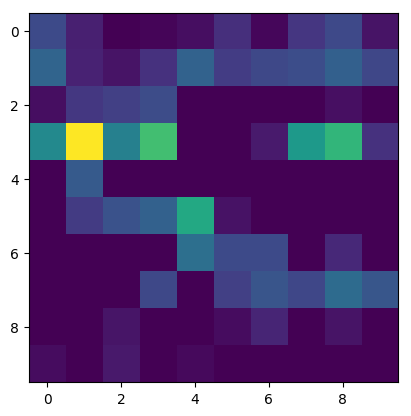

In [5]:
# url = 'https://img.alicdn.com/bao/uploaded/i3/1752533979/O1CN01VT7bYk1fGQZ3Li5Pj_!!1752533979.jpg' # GCOFFEE
url = 'https://img.alicdn.com/bao/uploaded/i1/1724505357/TB2EvprhlDH8KJjSszcXXbDTFXa_!!1724505357.jpg' # RTDC
test_IMG = url_to_image(url)
test_convert = convert_image(test_IMG,dim)
test_vec = np.expand_dims(test_convert,axis=0) # 一个图片因此加dim
test_vec=tf.cast(test_vec,tf.float32)
result = clf.predict(test_vec)
predict_label, prediction_prob = result.argmax(), result.max()
print('prediction is {0} with prob {1}'.format(label_dict[predict_label], prediction_prob))
heatmap = make_gradcam_heatmap(test_vec, clf, 'conv2d_3')
plt.imshow(heatmap)
plt.show()

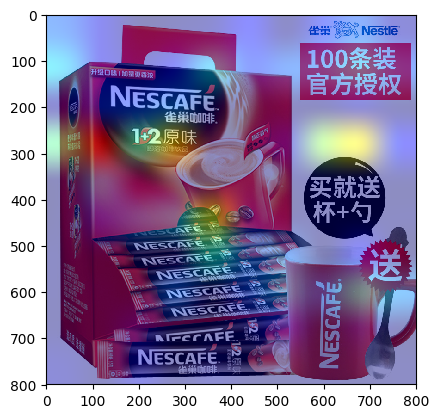

In [6]:
save_and_display_gradcam(test_IMG, heatmap,test_IMG.size, alpha=0.8,cam_path='/%s_cam.jpg' % predict_label)